In [1]:
import os
import random
import librosa
import scipy as sp
import numpy as np
import pandas as pd
import pylab as py 
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import scatterplotmatrix
import statsmodels.api as sm 


#visualização
import seaborn as sns
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**CARREGANDO DATASET**

In [49]:
features = pd.read_csv('/content/drive/My Drive/Audio Dataset/timeaudiofeatures1.csv')
all = pd.read_csv('/content/drive/My Drive/Audio Dataset/audio_all.csv')
x = pd.read_csv('/content/drive/My Drive/Audio Dataset/audio_data.csv')
y = pd.read_csv('/content/drive/My Drive/Audio Dataset/audio_labels.csv')
all.shape

(495, 8)

In [50]:
all.head()

,AMP,RMS,ZCR,FREQ. RANGE,TIME DECAY,SOURCE_Natural,SOURCE_Synthesized,CLASS
0,0.504545,0.367265,154.0,0.0,0.0,0,1,0
1,0.277817,0.205872,1783.0,0.0,0.0,0,1,0
2,0.372127,0.272040,35.0,0.0,0.0,0,1,0
3,0.415194,0.325032,436.0,0.0,0.0,0,1,0
4,0.241500,0.182390,66.0,0.0,0.0,0,1,0


In [51]:
Gaussian = all.iloc[:,0:3]
Class = all.iloc[:,7:8]
Bernoulli = all.iloc[:,3:8]

X = x.to_numpy()
Y = y.to_numpy()

In [52]:
Gaussian.head()

,AMP,RMS,ZCR
0,0.504545,0.367265,154.0
1,0.277817,0.205872,1783.0
2,0.372127,0.272040,35.0
3,0.415194,0.325032,436.0
4,0.241500,0.182390,66.0


In [53]:
Bernoulli.tail()

,FREQ. RANGE,TIME DECAY,SOURCE_Natural,SOURCE_Synthesized,CLASS
490,2.0,1.0,0,0,4
491,2.0,1.0,0,0,4
492,2.0,1.0,0,0,4
493,2.0,1.0,0,0,4
494,2.0,1.0,0,0,4


Normalizando os dados

In [54]:
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

#1. **VERIFICAÇÃO DE DISTRIBUIÇÕES (GAUSSIANA OU BERNOULLI)**

In [55]:
def descritive(x):
    # calculating descriptives of variable
    min = np.min(x)
    max = x.max()
    ran = x.max()-x.min()
    mean = x.mean()
    median = np.median(x)
    std = x.std()
    skew = sp.stats.skew(x)
    kurt = sp.stats.kurtosis(x)
    x

    # calculating points of standard deviation
    points = mean-std, mean+std

    # plotting the variable with every information
    sns.displot(x, kde=True)
    
    sns.lineplot(points, [0,0], color = 'black', label = "std")
    sns.scatterplot([min,max], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.ylabel('density')
    print(f"std {round(mean-std,2)} {round(mean+std,2)}") 
    print(f"kurtosis {round(kurt,2)}") 
    print(f"skewnees {round(skew,2)}") 
    print(f"range {round(min,2),round(max,2),round(ran,2)}") 
    print(f"mean {round(mean,2)}") 
    print(f"median {round(median,2)}")

Apenas as 3 primeiras features tem distribuição gaussiana, as 2 contínuas e 1 discreta, nas categóricas a ditribuição é de bernoulli

- Feature 1: Amplitude Envelope - Dist. Gaussiana

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

std 0.08 0.38
kurtosis 0.91
skewnees 1.22
range (0.04, 0.81, 0.77)
mean 0.23
median 0.19


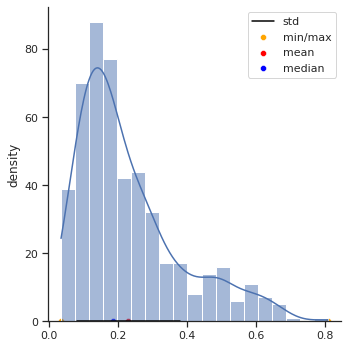

In [56]:
descritive(X[:,0])

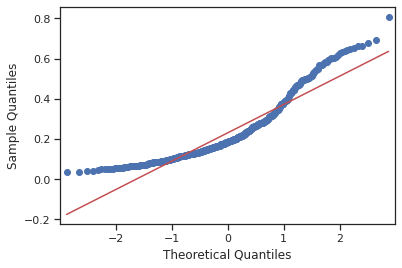

In [57]:
sm.qqplot(X[:,0], line = 'r') 
py.show() 

- Feature 2: Root-Mean Square - Dist. Gaussiana

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

std 0.02 0.24
kurtosis 2.16
skewnees 1.68
range (0.01, 0.56, 0.55)
mean 0.13
median 0.08


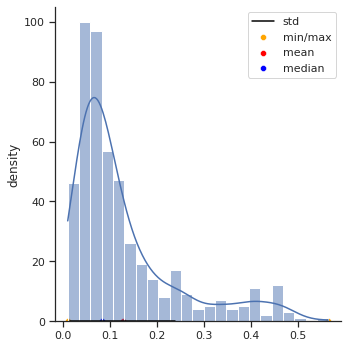

In [58]:
descritive(X[:,1])

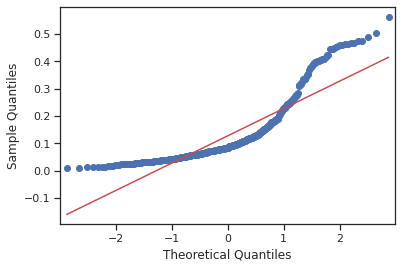

In [59]:
sm.qqplot(X[:,1], line = 'r') 
py.show() 

- Feature 3: Zero-Crossing Rate - Dist. Gaussiana

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

std -120.62 3580.78
kurtosis 5.59
skewnees 1.76
range (24.0, 14733.0, 14709.0)
mean 1730.08
median 1342.0


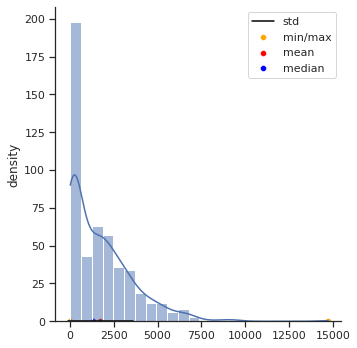

In [60]:
descritive(X[:,2])

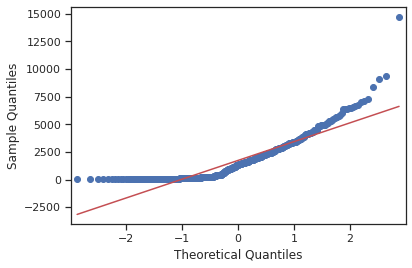

In [61]:
sm.qqplot(X[:,2], line = 'r') 
py.show() 

- Feature 4 - Frequency Range - Dist. Bernoulli

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

std 0.05 1.55
kurtosis -1.15
skewnees 0.34
range (0.0, 2.0, 2.0)
mean 0.8
median 1.0


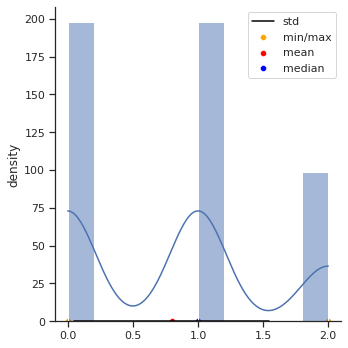

In [62]:
descritive(X[:,3])

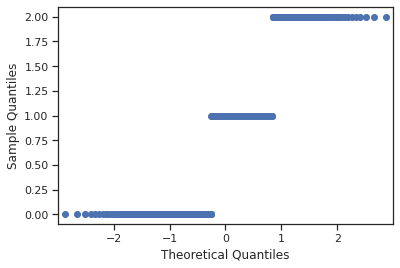

In [63]:
sm.qqplot(X[:,3], line = None) 
py.show() 

- Feature 5: Time Decay - Dist. Bernoilli

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

std 0.11 1.09
kurtosis -1.83
skewnees -0.41
range (0.0, 1.0, 1.0)
mean 0.6
median 1.0


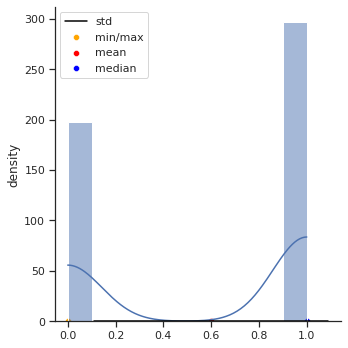

In [64]:
descritive(X[:,4])

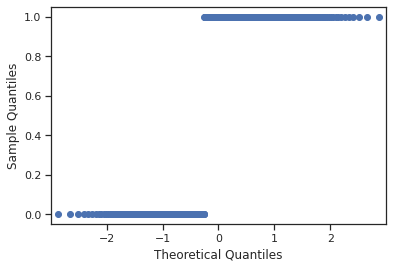

In [65]:
sm.qqplot(X[:,4], line = None) 
py.show() 

- Feature 5 & 6 - One Hot Encoding de SOURCES - Dist. Bernoulli

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

std -0.2 0.6
kurtosis 0.25
skewnees 1.5
range (0.0, 1.0, 1.0)
mean 0.2
median 0.0


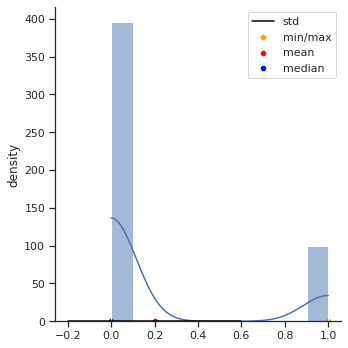

In [66]:
descritive(X[:,5])

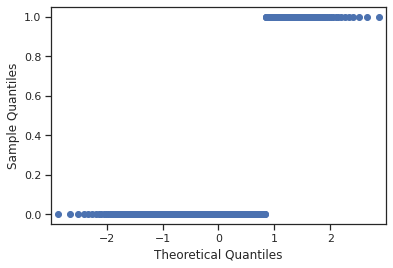

In [67]:
sm.qqplot(X[:,5], line = None) 
py.show() 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

std -0.2 0.6
kurtosis 0.25
skewnees 1.5
range (0.0, 1.0, 1.0)
mean 0.2
median 0.0


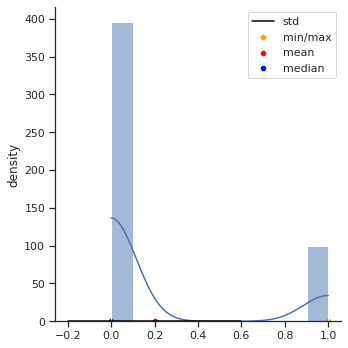

In [68]:
descritive(X[:,6])

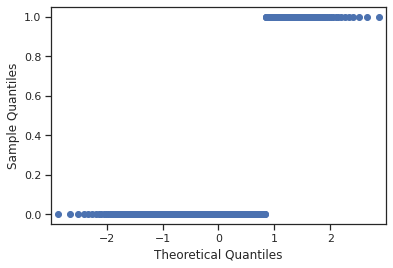

In [69]:
sm.qqplot(X[:,6], line = None) 
py.show() 

#2. **COVARIÂNCIA E CORRELAÇÃO**

- Matriz de Covariância

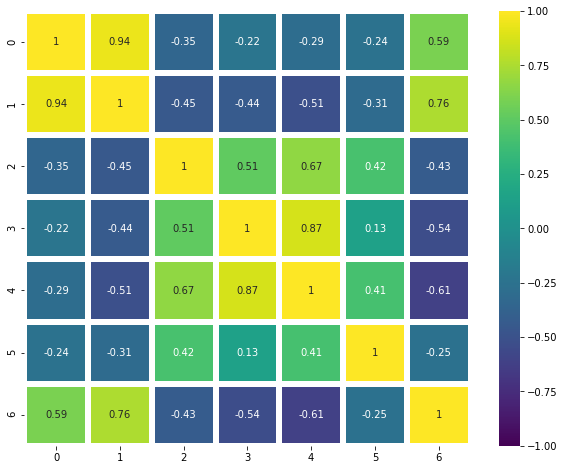

In [25]:
cov = np.cov(X_std.T)
fig, ax = plt.subplots(figsize=(10,8))     
sns.heatmap(cov, vmin=-1, vmax=1, cmap='viridis',annot=True,linewidths=5,ax=ax)

- Matriz de Correlação

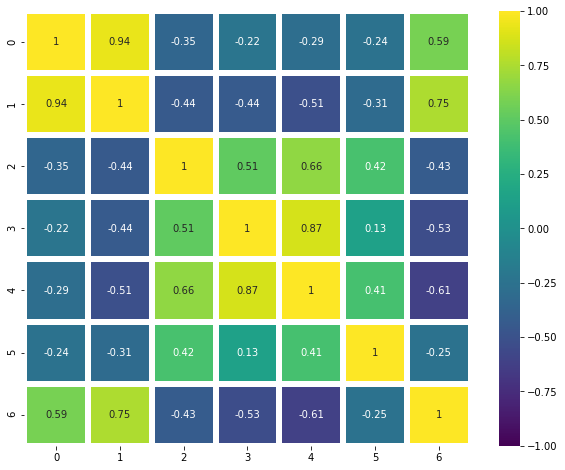

In [26]:
corr = np.corrcoef(X_std.T)
fig, ax = plt.subplots(figsize=(10,8))        
sns.heatmap(corr, vmin=-1, vmax=1, cmap='viridis',annot=True,linewidths=5,ax=ax)

- **Scatterplot**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

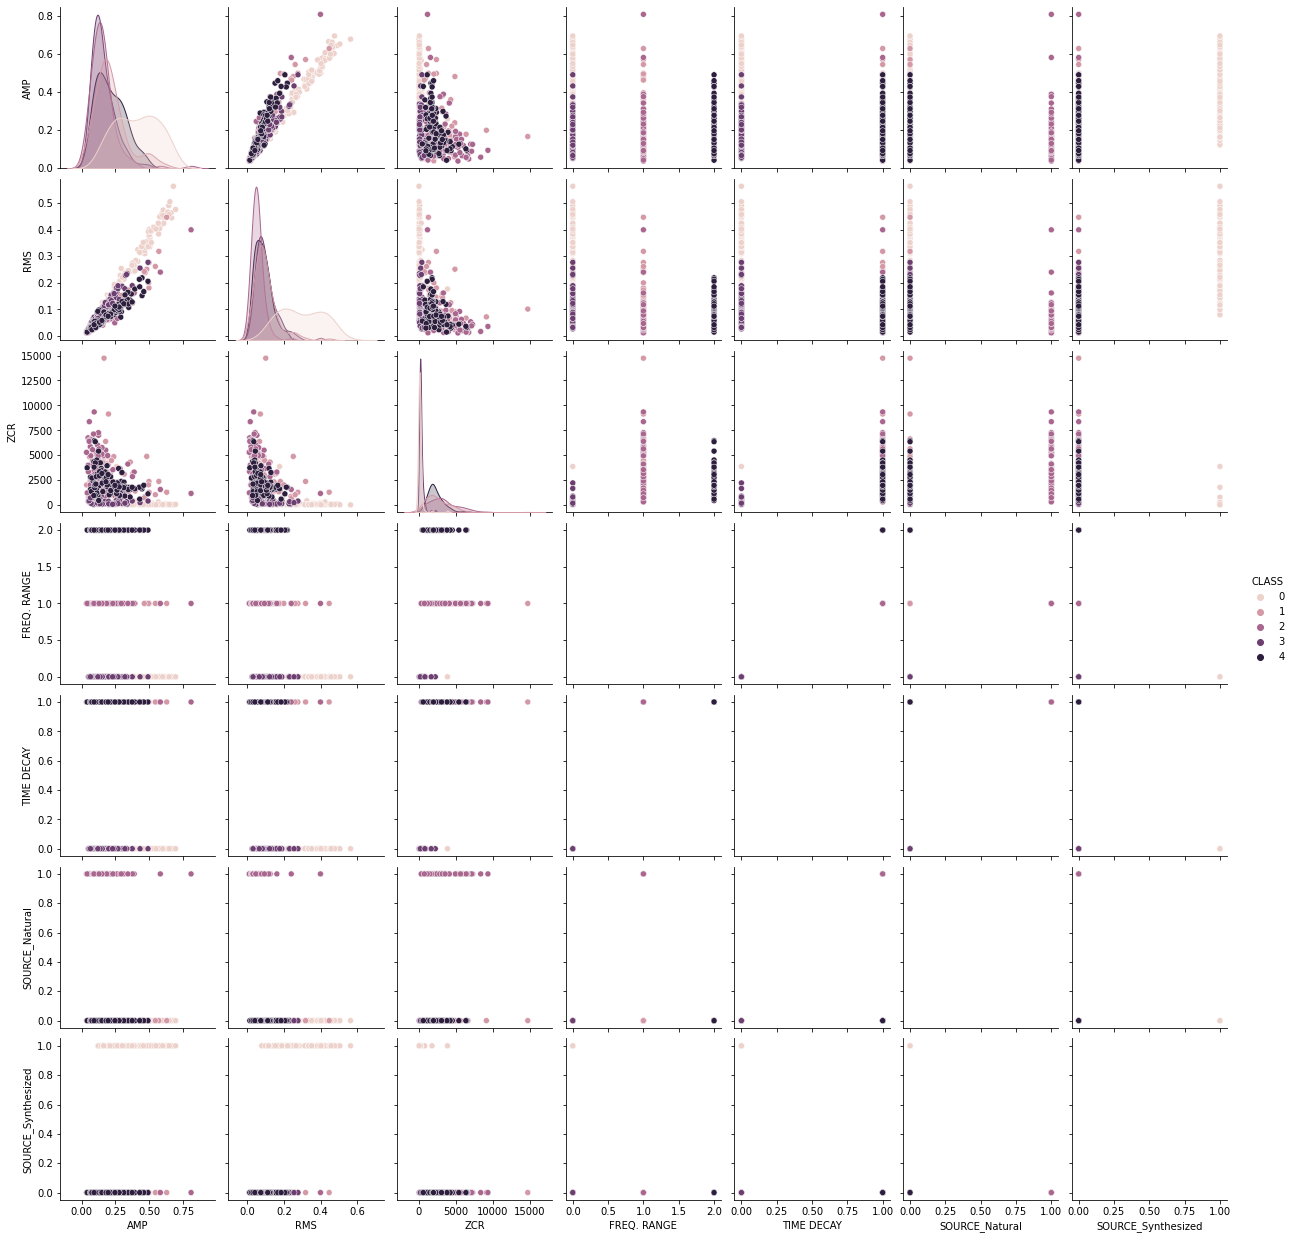

In [27]:
sns.pairplot(all, kind="scatter", hue = 'CLASS')

- **Pairplot**


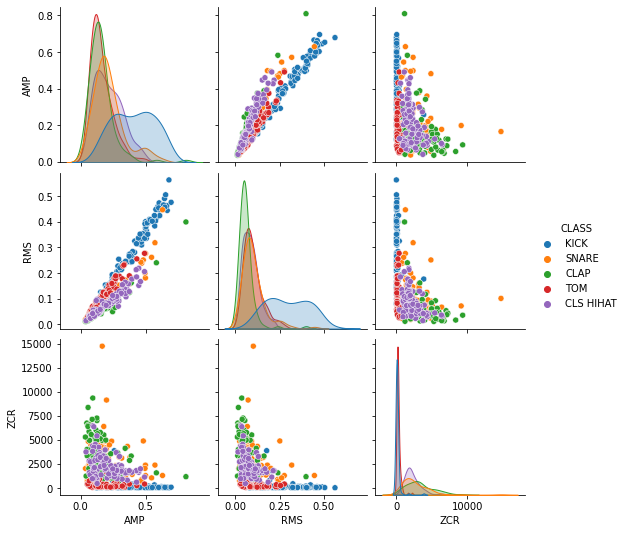

In [28]:
sns.pairplot(features, hue = "CLASS")

- **Multiple Linear Regression**

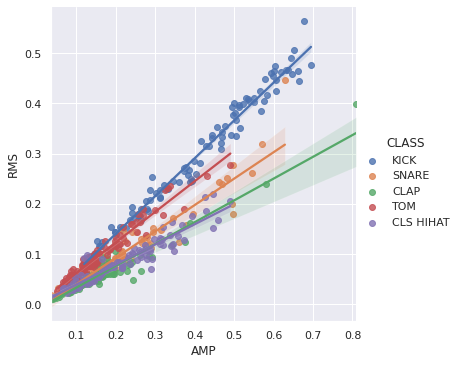

In [29]:
sns.set_theme()
g = sns.lmplot(data=features, x="AMP", y="RMS", hue="CLASS", height=5)
g.set_axis_labels("AMP", "RMS")

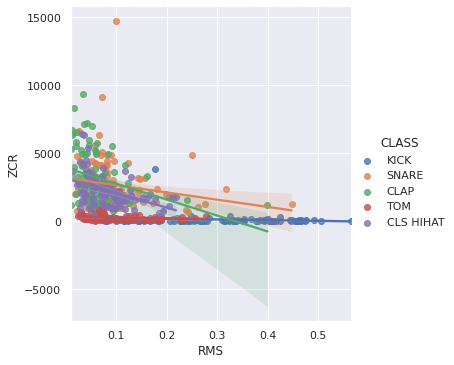

In [30]:
sns.set_theme()
g = sns.lmplot(data=features, x="RMS", y="ZCR", hue="CLASS", height=5)
g.set_axis_labels("RMS", "ZCR")

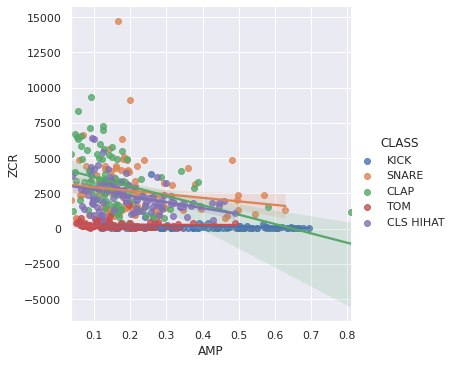

In [31]:
sns.set_theme()
g = sns.lmplot(data=features, x="AMP", y="ZCR", hue="CLASS", height=5)
g.set_axis_labels("AMP", "ZCR")

#3. **REMOVENDO OUTLIERS**

Por hora escolhi remover os outliers se baseando nos dados por cada feature, que nos dá 3 verificações, para uma resposta mais refinada ainda podemos remover outliers verificando por classe x feature o que seriam necessárias 15 verificações...

In [70]:
features.describe()

,AMP,RMS,ZCR
count,499.000000,499.000000,499.000000
mean,0.229993,0.127677,1722.012024
std,0.148514,0.111734,1847.992965
min,0.036027,0.010925,24.000000
25%,0.124015,0.055413,178.000000
50%,0.184680,0.083815,1332.000000
75%,0.288331,0.153999,2634.500000
max,0.808722,0.563698,14733.000000


Serão considerados OUTLIERS todos os dados acima e abaixo de 3 Desvios Padrões da média

In [82]:
index = []

- AMP Outliers

In [81]:
lower_limit1 = features.AMP.mean() -3*features.AMP.std()
upper_limit1 = features.AMP.mean() + 3*features.AMP.std()
lower_limit1, upper_limit1

(-0.21554809713391393, 0.6755338850136734)

In [83]:
index.append(features.AMP[(features.AMP>upper_limit1) | (features.AMP<lower_limit1)].index)
index

[Int64Index([41, 58, 214], dtype='int64')]

- RMS Outliers

In [84]:
lower_limit2 = features.RMS.mean() -3*features.RMS.std()
upper_limit2 = features.RMS.mean() + 3*features.RMS.std()
lower_limit2, upper_limit2

(-0.20752375002798615, 0.4628778798676656)

In [85]:
index.append(features.RMS[(features.RMS>upper_limit2) | (features.RMS<lower_limit2)].index)
index

[Int64Index([41, 58, 214], dtype='int64'),
 Int64Index([9, 13, 18, 31, 35, 41, 42, 48, 58], dtype='int64')]

- ZCR Outliers


In [86]:
lower_limit3 = features.ZCR.mean() -3*features.ZCR.std()
upper_limit3 = features.ZCR.mean() + 3*features.ZCR.std()
lower_limit3, upper_limit3

(-3821.9668718980456, 7265.9909199942385)

In [87]:
index.append(features.ZCR[(features.ZCR>upper_limit3) | (features.ZCR<lower_limit3)].index)
index

[Int64Index([41, 58, 214], dtype='int64'),
 Int64Index([9, 13, 18, 31, 35, 41, 42, 48, 58], dtype='int64'),
 Int64Index([105, 172, 201, 267], dtype='int64')]

In [88]:
#achatando tudo em uma lista só
flattened  = [val for sublist in index for val in sublist]
flattened

[41, 58, 214, 9, 13, 18, 31, 35, 41, 42, 48, 58, 105, 172, 201, 267]

In [89]:
#removendo índices duplicados
to_remove = list(set(flattened))
to_remove

[35, 41, 9, 42, 105, 13, 172, 201, 48, 267, 18, 214, 58, 31]

In [90]:
#removendo tuplas dos índices correspondentes aos dados outliers
clean_data = features.drop(to_remove)
clean_data.shape

(486, 7)

#4. **DISTRIBUIÇÃO NORMAL MULTIVARIADA (2D)**

Justificativa: A escolha sobre a distribuição, foi porque como optei por exibir as distribuições de acordo com a classe, cada feature nos gera 5 distribuições por features, a representação 3D teria 15 distribuições, o que com 10 em 2D já fica poluído ao observarmos. 
A representação gráfica utilizada foi a:
- **Kernel Density Estimate**

AMP x RMS

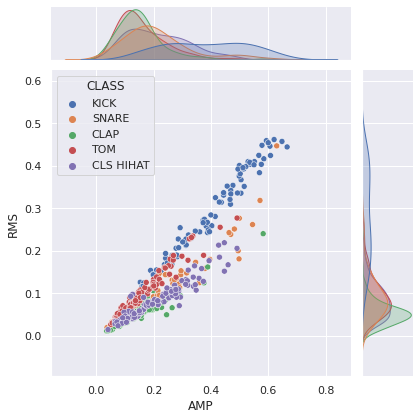

In [43]:
sns.jointplot(data=clean_data, x="AMP", y="RMS", hue="CLASS")

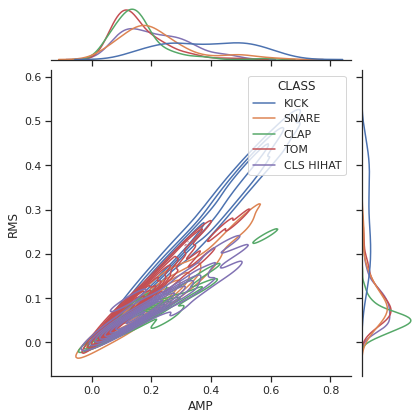

In [44]:
sns.set_theme(style="ticks")
g = sns.jointplot(data= clean_data, x="AMP", y="RMS", hue="CLASS", kind="kde",)

AMP x ZCR

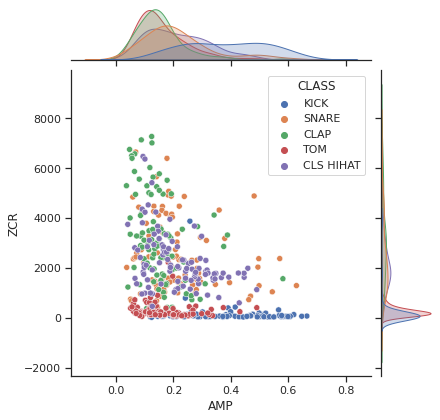

In [45]:
sns.jointplot(data=clean_data, x="AMP", y="ZCR", hue="CLASS")

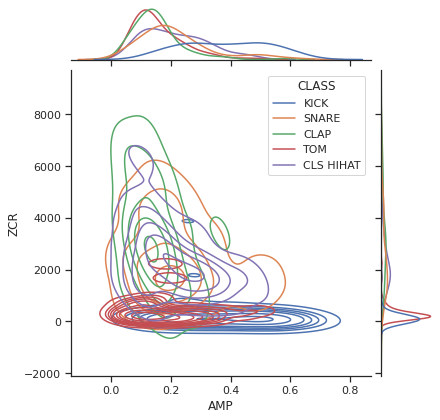

In [46]:
sns.set_theme(style="ticks")
g = sns.jointplot(data= clean_data, x="AMP", y="ZCR", hue="CLASS", kind="kde",)

RMS x ZCR

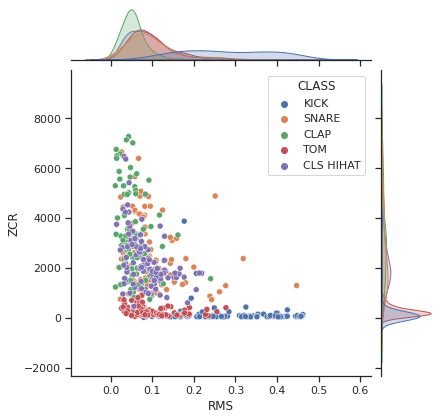

In [47]:
sns.jointplot(data=clean_data, x="RMS", y="ZCR", hue="CLASS")

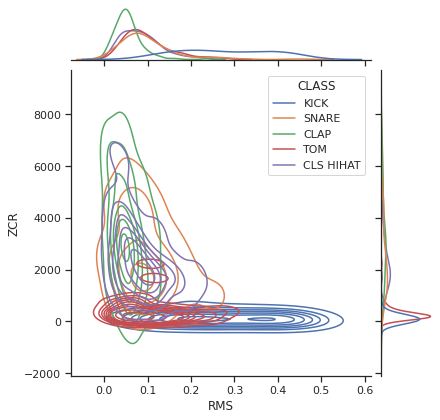

In [48]:
sns.set_theme(style="ticks")
g = sns.jointplot(data= clean_data, x="RMS", y="ZCR", hue="CLASS", kind="kde",)